# feature selection : Wrapper method
https://todayisbetterthanyesterday.tistory.com/9

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 

import statsmodels.api as sm

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 데이터 불러오기

In [2]:
df_full = pd.read_csv(r'..\..\..\Data\최종데이터셋\finaldataset_ver7.6.csv')

In [3]:
df_full[df_full['부도']==1]

,회사명,거래소코드,회계년도,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,...,기타,외국인_주식분포비율,종가,종가변동률,년,key,부도,신종채권_운영,신종채권_시설,신종채권_기타
119,(주)경윤하이드로에너지,19120.0,2010/12,125.49,125.49,54.90,133.36,6.92,102.25,30.22,...,0.0,0.00,119.0,-0.764356,2010.0,191202011.0,1.0,0.0,0.0,0.0
174,(주)골드카운티,58900.0,2009/12,720.74,712.41,5.34,66.88,31.44,5.34,0.00,...,0.0,0.00,420.0,-0.594203,2009.0,589002010.0,1.0,0.0,0.0,0.0
352,(주)굿이엠지,51530.0,2008/12,33.40,33.40,925.60,854.54,-52.98,1063.68,43.72,...,0.0,4.43,500.0,-0.914821,2008.0,515302009.0,1.0,2.0,0.0,0.0
572,(주)나노트로닉스,10670.0,2012/12,108.08,93.45,102.12,93.26,4.05,103.63,41.40,...,0.0,0.00,4890.0,0.153302,2012.0,106702013.0,1.0,0.0,0.0,1.0
581,(주)나노하이텍,71360.0,2008/12,133.50,133.29,181.05,49.79,20.81,191.50,20.58,...,0.0,2.90,260.0,-0.750000,2008.0,713602009.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26320,한빛전자통신(주),44570.0,2001/12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,2800.0,0.000000,2001.0,445702002.0,1.0,0.0,0.0,0.0
26341,한솔신텍(주),99660.0,2017/12,80.74,73.52,308.59,217.16,-12.75,366.30,35.62,...,0.0,1.46,1015.0,-0.460106,2017.0,996602018.0,1.0,0.0,0.0,1.0
26581,해원에스티(주),58480.0,2009/12,99.04,67.10,334.78,129.13,-0.70,360.69,49.82,...,0.0,0.00,930.0,0.162500,2009.0,584802010.0,1.0,0.0,0.0,0.0
26688,현주컴퓨터(주),38960.0,2004/06,53.45,26.75,1060.23,593.71,-42.53,1060.44,43.28,...,0.0,1.21,430.0,-0.650407,2004.0,389602005.0,1.0,0.0,0.0,0.0


In [4]:
print(df_full.shape)
print(df_full.columns)

(26832, 84)
Index(['회사명', '거래소코드', '회계년도', '유동비율', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율',
       '부채비율', '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률',
       '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률',
       '매출액영업이익률', '당좌자산회전률', '재고자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률',
       '매출채권회전률', '매입채무회전률', '유형자산회전율', '설비투자효율', '총자본투자효율', '자기자본증가율',
       '매출액증가율', '영업이익증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액',
       '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율',
       '매출원가율', '부가가치율', '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율', '정기공시제목', '수시공시제목', '대표이사_변경',
       '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자', '출자목적_경영권',
       '출자목적_영업이익', '기타', '외국인_주식분포비율', '종가', '종가변동률', '년', 'key', '부도',
       '신

In [5]:
col_head= ['거래소코드', '회계년도']
col_finance = ['유동비율', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율',
       '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률',
       '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률',
       '매출액영업이익률', '당좌자산회전률', '재고자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률',
       '매출채권회전률', '매입채무회전률', '유형자산회전율', '설비투자효율', '총자본투자효율', '자기자본증가율',
       '매출액증가율', '영업이익증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액',
       '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율',
       '매출원가율', '부가가치율', '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율', '부도']
col_text = ['대표이사_변경',
       '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자', '출자목적_경영권',
       '출자목적_영업이익', '기타', '외국인_주식분포비율', '종가', '종가변동률']
col_text2 = [ '신종채권_운영', '신종채권_시설', '신종채권_기타']
col_tail = [ '년', 'key', '부도']

In [6]:
df = df_full[col_finance]

In [7]:
X = df.drop(columns=['부도'])
y = df_full['부도']

full_model = sm.OLS(y,X)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     부도   R-squared (uncentered):                   0.141
Model:                            OLS   Adj. R-squared (uncentered):              0.139
Method:                 Least Squares   F-statistic:                              73.15
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:12:45   Log-Likelihood:                          20323.
No. Observations:               26832   AIC:                                 -4.053e+04
Df Residuals:                   26772   BIC:                                 -4.003e+04
Df Model:                          60                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
유동비율            2.055e-05   1.21e-05      1.699      0.089   -3.16e-06    4.42e-05
당좌비율           -2.053e-05   1.21e-05     -1.698      0.090   -4.42e-05    3.17e-06
유동부채비율          1.079e-05   2.39e-06      4.515      0.000    6.11e-06    1.55e-05
비유동비율          -4.471e-05    4.2e-06    -10.640      0.000   -5.29e-05   -3.65e-05
순운전자본비율           -0.0002    4.7e-05     -3.287      0.001      -0.000   -6.23e-05
부채비율            3.201e-05   4.06e-06      7.876      0.000     2.4e-05       4e-05
차입금의존도          3.039e-05   5.51e-05      0.552      0.581   -7.76e-05       0.000
비유동장기적합률           0.0001   1.25e-05     10.575      0.000       0.000       0.000
매출채권_대_매입채무비율    1.31e-08   1.15e-08      1.140      0.254   -9.43e-09    3.56e-08
자기자본순이익률        4.184e-06   1.12e-05      0.374      0.709   -1.78e-05    2.61e-05
총자본순이익률           -0.0006   5.89e-05    -10.271      0.000      -0.001      -0.000
자기자본영업이익률         -0.0001   3.32e-05     -3.590      0.000      -0.000   -5.41e-05
총자본영업이익률           0.0010      0.000      6.114      0.000       0.001       0.001
경영자본순이익률          -0.0002   2.62e-05     -6.721      0.000      -0.000      -0.000
경영자본영업이익률         -0.0005   9.71e-05     -4.710      0.000      -0.001      -0.000
매출액순이익률         2.305e-06   7.17e-07      3.214      0.001       9e-07    3.71e-06
금융비용부담률         7.111e-06   4.27e-06      1.666      0.096   -1.26e-06    1.55e-05
매출액영업이익률        1.301e-06   4.11e-06      0.317      0.752   -6.75e-06    9.36e-06
당좌자산회전률           -0.0021      0.000     -4.389      0.000      -0.003      -0.001
재고자산회전률         -5.79e-11   1.47e-09     -0.040      0.968   -2.93e-09    2.81e-09
자기자본회전률           -0.0018      0.000     -4.626      0.000      -0.003      -0.001
경영자본회전률            0.0018      0.002      0.892      0.373      -0.002       0.006
비유동자산회전률           0.0007      0.000      3.137      0.002       0.000       0.001
매출채권회전률         8.156e-08   5.46e-07      0.149      0.881   -9.88e-07    1.15e-06
매입채무회전률         3.247e-08   1.09e-07      0.298      0.766   -1.81e-07    2.46e-07
유형자산회전율         2.374e-07   1.51e-06      0.157      0.875   -2.73e-06     3.2e-06
설비투자효율         -4.825e-10    6.1e-10     -0.791      0.429   -1.68e-09    7.14e-10
총자본투자효율         1.516e-05   1.54e-05      0.986      0.324    -1.5e-05    4.53e-05
자기자본증가율         3.541e-06    2.4e-06      1.477      0.140   -1.16e-06    8.24e-06
매출액증가율         -1.109e-07   4.61e-07     -0.241      0.810   -1.01e-06    7.92e-07
영업이익증가율        -1.965e-07   8.34e-07     -0.236      0.814   -1.83e-06    1.44e-06
순이익증가율          4.502e-07   5.01e-07      0.899      0.369   -5.31e-07    1.43e-06
유형자산증가율         4.531e-09   1.12e-07      0.041      0.968   -2.14e-07    2.23e

In [13]:
df.columns

Index(['유동비율', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율', '차입금의존도',
       '비유동장기적합률', '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률', '자기자본영업이익률',
       '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률', '매출액영업이익률',
       '당좌자산회전률', '재고자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률', '매출채권회전률',
       '매입채무회전률', '유형자산회전율', '설비투자효율', '총자본투자효율', '자기자본증가율', '매출액증가율',
       '영업이익증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액', '부채구성비율',
       '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율', '매출원가율',
       '부가가치율', '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율', '부도'],
      dtype='object')

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,features,VIF Factor
0,유동비율,49825.884466
1,당좌비율,49810.913284
2,유동부채비율,9.406044
3,비유동비율,35.621688
4,순운전자본비율,7.126831
5,부채비율,58.307814
6,차입금의존도,6.386211
7,비유동장기적합률,3.212533
8,매출채권_대_매입채무비율,1.078018
9,자기자본순이익률,2.636732


In [21]:
print(len(vif[vif['VIF Factor']<10]))
vif_list = vif[vif['VIF Factor']<10]['features'].tolist()
vif_list

42


['유동부채비율',
 '순운전자본비율',
 '차입금의존도',
 '비유동장기적합률',
 '매출채권_대_매입채무비율',
 '자기자본순이익률',
 '총자본순이익률',
 '자기자본영업이익률',
 '경영자본순이익률',
 '경영자본영업이익률',
 '금융비용부담률',
 '당좌자산회전률',
 '재고자산회전률',
 '자기자본회전률',
 '비유동자산회전률',
 '매출채권회전률',
 '매입채무회전률',
 '유형자산회전율',
 '설비투자효율',
 '총자본투자효율',
 '자기자본증가율',
 '매출액증가율',
 '영업이익증가율',
 '순이익증가율',
 '유형자산증가율',
 '유동자산증가율',
 '청산가치율',
 '매출원가율',
 '재고자산보유기간',
 '매출채권회수기간',
 '매입채무지급기간',
 'EBITDA유동부채비율',
 'EBITDA단기차입비율',
 'EBITDA총자산비율',
 'EBITDA총부채비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '자기자본배당률',
 '금융비용_대_부채비율',
 '자기자본배율',
 '누적수익성비율',
 '총자산영업이익률']

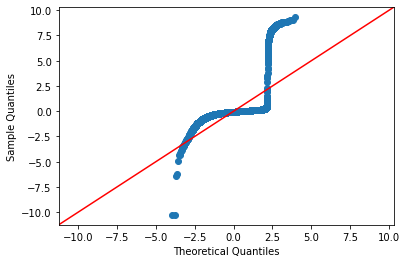

In [34]:
# 학습데이터의 잔차 확인(잔차(residual) : 표본(sample)으로 추정한 회귀식과 실제 관측값의 차이)

res = fitted_full_model.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res,fit = True,line = '45')

 """q-q plot은 잔차의 정규성을 확인할 때 쓰는 그래프 중 하나로, statsmodels.api 라이브러리 내에 존재한다. 
 이 q-q plot은 y=x의 형태를 띄어야 정규성을 보이는 것이다. 위의 그래프를 보면 잔차가 완전한 정규성을 보이지 않는 것을 확인할 수 있다. 
 하지만, 실제데이터는 잔차가 완전한 정규성을 띄는 것을 확인하기 힘들다. 보통 위의 그래프처럼 실제에서도 꼬리부분의 값을이 정규성을 띄지 않는 경우가 많다. 
 그래도 위의 그래프는 꼬리부분 약간의 데이터를 제외하고 정규성을 띄고 있다고 판단되어 양호하다는 판단이 가능하다."""

In [40]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.
feature_columns =  X.columns.tolist()

def processSubset(X,y,feature_set):
    
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    
    return {"model" : regr, "AIC" : AIC}

    
print(processSubset(X = X, y = y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024BC0685A00>, 'AIC': -37352.69750138422}


## NEW

In [9]:

#변수 선택법
featureColums =  X.columns.tolist()
def processSubset(x,y, feature_set):
    feature_set =  X.columns.tolist()
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
print(processSubset(x=X,y=y,feature_set=featureColums[0:5]))
 
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['const']),k): 
        combo=(list(combo)+['const'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel
 
#print(getBest(x=trainX,y=trainY,k=2))
 
#변수 선택에 따른 학습시간과 저장 K 반복
 
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()ls = pd.DataFrame(columns=["AIC","model"])
for i in range(1,4):
    models.loc[i] = getBest(X,y,i)
 
#toc = time.time()
#print("Total elapsed time : ",(toc-tic),"seconds")
 
#print(models)

SyntaxError: invalid syntax (Temp/ipykernel_8996/1136204283.py, line 37)

## backward

In [24]:
#함수출처 : https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [25]:
len(df.columns.tolist())

61

In [35]:
features = X.columns.tolist()
features_with_constant = sm.add_constant(X[features])
sm.OLS(y, features_with_constant).fit().pvalues[1:]<0.05

In [38]:
sm.OLS(y, features_with_constant).fit().pvalues[1:]<0.05

유동비율              False
당좌비율              False
유동부채비율             True
비유동비율              True
순운전자본비율            True
부채비율               True
차입금의존도            False
비유동장기적합률           True
매출채권_대_매입채무비율     False
자기자본순이익률          False
총자본순이익률            True
자기자본영업이익률          True
총자본영업이익률           True
경영자본순이익률           True
경영자본영업이익률          True
매출액순이익률            True
금융비용부담률           False
매출액영업이익률          False
당좌자산회전률            True
재고자산회전률           False
자기자본회전률            True
경영자본회전률           False
비유동자산회전률           True
매출채권회전률           False
매입채무회전률           False
유형자산회전율           False
설비투자효율            False
총자본투자효율           False
자기자본증가율           False
매출액증가율            False
영업이익증가율           False
순이익증가율            False
유형자산증가율           False
유동자산증가율           False
EBITDA_매출액        False
부채구성비율             True
청산가치율             False
이익잉여금비율            True
자본잉여금비율           False
경영자산비율             True
이자보상비율            False
매출액판관비율         

In [28]:
print(len(backward_elimination(X, y, significance_level = 0.05)))
backward_elimination(X, y, significance_level = 0.05)

28


['유동부채비율',
 '비유동비율',
 '순운전자본비율',
 '부채비율',
 '비유동장기적합률',
 '총자본순이익률',
 '자기자본영업이익률',
 '총자본영업이익률',
 '경영자본순이익률',
 '경영자본영업이익률',
 '매출액순이익률',
 '당좌자산회전률',
 '자기자본회전률',
 '비유동자산회전률',
 '부채구성비율',
 '청산가치율',
 '이익잉여금비율',
 '경영자산비율',
 '매출원가율',
 '부가가치율',
 '재고자산보유기간',
 '매출채권회수기간',
 'EBITDA총자산비율',
 'EBITDA총부채비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '누적수익성비율',
 '총자산영업이익률']

In [44]:
final_col = ['부채비율', '순운전자본비율', '비유동비율', '비유동장기적합률', '부채구성비율', '경영자본순이익률', '자기자본순이익률', '총자본순이익률', 
             '당좌자산회전률', '자기자본회전률', '비유동자산회전률','부가가치율', '자기자본증가율', '유형자산증가율', '영업이익증가율', '재고자산보유기간','매출채권회수기간', 'EBITDA총자산비율',
 'EBITDA총부채비율', '영업이익대비EBITDA비율' ]

In [46]:
X1 = df[final_col]

In [48]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X1, y)
print('{:.3f}'.format(lasso.score(X1, y)))

0.052


In [50]:
# 사용한 변수 개수
print('전체 변수 개수 : ' ,np.sum(lasso.coef_.shape))
print('**사용된 변수 개수 : ' ,np.sum(lasso.coef_ != 0))

전체 변수 개수 :  20
**사용된 변수 개수 :  7


In [53]:
lasso_coef =lasso.coef_.tolist() # lasso 변수별 계수 리스트
lasso_feature = lasso.feature_names_in_.tolist() # 변수 리스트
df_lasso = pd.DataFrame([lasso_feature, lasso_coef])
df_lasso = df_lasso.rename(columns=df_lasso.iloc[0]).drop(df_lasso.index[0]).rename(index={1: 'lasso coef'})
lasso_n_0 = df_lasso != 0
lasso_n_0=lasso_n_0.rename(index={'lasso coef' : 'used'})
df_lasso = pd.concat([df_lasso, lasso_n_0]).T
df_lasso

,lasso coef,used
부채비율,0.000008,True
순운전자본비율,-0.0,False
비유동비율,-0.000005,True
비유동장기적합률,0.0,False
부채구성비율,0.0,False
경영자본순이익률,-0.00023,True
자기자본순이익률,-0.000005,True
총자본순이익률,-0.0,False
당좌자산회전률,-0.0,False
자기자본회전률,-0.0,False


In [55]:
df_lasso[df_lasso['used']==True]

,lasso coef,used
부채비율,0.000008,True
비유동비율,-0.000005,True
경영자본순이익률,-0.00023,True
자기자본순이익률,-0.000005,True
부가가치율,-0.0,True
매출채권회수기간,0.00002,True
영업이익대비EBITDA비율,0.000002,True


## 최종변수선정

In [58]:
df

,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,비유동장기적합률,매출채권_대_매입채무비율,자기자본순이익률,...,EBITDA총부채비율,영업이익대비영업현금흐름비율,영업이익대비EBITDA비율,자기자본배당률,금융비용_대_부채비율,자기자본배율,누적수익성비율,총자산영업이익률,총자산회전율,부도
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.022311,0.000000,0.00,0.019074,179.37,0.189100,0.052949,1.761228,0.0
1,141.01,19.89,131.99,51.76,22.76,137.88,50.60,48.88,2.25,1.26,...,0.000000,-0.014006,0.000000,0.00,0.023517,179.37,0.005261,0.014062,0.756792,0.0
2,114.21,16.60,132.37,84.50,7.98,135.68,53.16,81.79,10.12,-29.43,...,0.000000,-0.248436,0.000000,0.00,0.043081,133.37,-0.139212,-0.247841,1.713785,0.0
3,185.63,23.55,71.46,39.31,35.58,71.96,29.13,39.12,6.83,1.70,...,0.000000,-0.084541,0.000000,0.00,0.058531,131.30,-0.203019,-0.082618,1.571816,0.0
4,149.73,17.11,101.56,50.23,24.97,102.30,29.59,49.86,95.41,-86.13,...,0.000000,-2.425973,0.000000,0.00,0.047346,52.25,-1.181502,-0.547982,2.526356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,411.65,341.54,5.19,93.01,14.15,14.40,7.58,85.17,0.00,3.17,...,13.539357,0.086380,71.485777,2.10,0.012651,4611.84,0.414800,0.012181,1.817620,0.0
26828,177.50,146.69,12.83,91.80,8.68,14.56,7.51,90.23,10241.82,2.97,...,11.297106,0.048203,65.443201,2.08,0.012502,4650.29,0.417422,0.009398,1.946103,0.0
26829,329.17,290.09,5.40,89.00,11.59,6.76,0.00,87.80,139592.04,3.38,...,30.480579,0.021654,75.217490,2.48,0.018056,4696.15,0.453302,0.014520,2.210036,0.0
26830,485.39,422.76,6.05,79.27,21.47,8.65,0.00,77.27,53375.77,11.25,...,15.153904,0.068548,49.640822,2.83,0.000300,5133.42,0.485889,0.005988,1.800947,0.0


In [57]:
anova_drop = ['매출액순이익률',
 'EBITDA_매출액',
 '청산가치율',
 '이익잉여금비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '유동비율',
 '매출채권_대_매입채무비율',
 '금융비용부담률',
 '재고자산회전률',
 '매출채권회전률',
 '매입채무회전률',
 '유형자산회전율',
 '자기자본증가율',
 '매출액증가율',
 '영업이익증가율',
 '순이익증가율',
 '유형자산증가율',
 '유동자산증가율',
 '이자보상비율',
 '매출액판관비율',
 'EBITDA이자보상비율',
 '자기자본배당률',
 '자기자본배율']

In [62]:
anova = df.drop(columns=anova_drop)
print(len(anova.columns))
print(anova.columns)

37
Index(['당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율', '차입금의존도', '비유동장기적합률',
       '자기자본순이익률', '총자본순이익률', '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률',
       '매출액영업이익률', '당좌자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률', '설비투자효율',
       '총자본투자효율', '부채구성비율', '자본잉여금비율', '경영자산비율', '매출원가율', '부가가치율', '재고자산보유기간',
       '매출채권회수기간', '매입채무지급기간', 'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율',
       'EBITDA총부채비율', '금융비용_대_부채비율', '누적수익성비율', '총자산영업이익률', '총자산회전율', '부도'],
      dtype='object')


In [63]:
lasso = ['당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율', '비유동장기적합률',
       '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률', '경영자본순이익률', '매출액순이익률',
       '재고자산회전률', '매입채무회전률', '설비투자효율', '총자본투자효율', '자기자본증가율', '영업이익증가율',
       '순이익증가율', '유형자산증가율', '부채구성비율', '청산가치율', '이익잉여금비율', '이자보상비율', '매출액판관비율',
       '부가가치율', '재고자산보유기간', '매출채권회수기간', 'EBITDA단기차입비율', '영업이익대비EBITDA비율',
       '자기자본배율']

In [64]:
back = [['유동부채비율',
 '비유동비율',
 '순운전자본비율',
 '부채비율',
 '비유동장기적합률',
 '총자본순이익률',
 '자기자본영업이익률',
 '총자본영업이익률',
 '경영자본순이익률',
 '경영자본영업이익률',
 '매출액순이익률',
 '당좌자산회전률',
 '자기자본회전률',
 '비유동자산회전률',
 '부채구성비율',
 '청산가치율',
 '이익잉여금비율',
 '경영자산비율',
 '매출원가율',
 '부가가치율',
 '재고자산보유기간',
 '매출채권회수기간',
 'EBITDA총자산비율',
 'EBITDA총부채비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '누적수익성비율',
 '총자산영업이익률']]

In [65]:
total = ['매출액순이익률',
 'EBITDA_매출액',
 '청산가치율',
 '이익잉여금비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '유동비율',
 '매출채권_대_매입채무비율',
 '금융비용부담률',
 '재고자산회전률',
 '매출채권회전률',
 '매입채무회전률',
 '유형자산회전율',
 '자기자본증가율',
 '매출액증가율',
 '영업이익증가율',
 '순이익증가율',
 '유형자산증가율',
 '유동자산증가율',
 '이자보상비율',
 '매출액판관비율',
 'EBITDA이자보상비율',
 '자기자본배당률',
 '자기자본배율', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율', '비유동장기적합률',
       '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률', '경영자본순이익률', '매출액순이익률',
       '재고자산회전률', '매입채무회전률', '설비투자효율', '총자본투자효율', '자기자본증가율', '영업이익증가율',
       '순이익증가율', '유형자산증가율', '부채구성비율', '청산가치율', '이익잉여금비율', '이자보상비율', '매출액판관비율',
       '부가가치율', '재고자산보유기간', '매출채권회수기간', 'EBITDA단기차입비율', '영업이익대비EBITDA비율',
       '자기자본배율' , '유동부채비율',
 '비유동비율',
 '순운전자본비율',
 '부채비율',
 '비유동장기적합률',
 '총자본순이익률',
 '자기자본영업이익률',
 '총자본영업이익률',
 '경영자본순이익률',
 '경영자본영업이익률',
 '매출액순이익률',
 '당좌자산회전률',
 '자기자본회전률',
 '비유동자산회전률',
 '부채구성비율',
 '청산가치율',
 '이익잉여금비율',
 '경영자산비율',
 '매출원가율',
 '부가가치율',
 '재고자산보유기간',
 '매출채권회수기간',
 'EBITDA총자산비율',
 'EBITDA총부채비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '누적수익성비율',
 '총자산영업이익률']

In [69]:
result = [] # 중복 제거된 값들이 들어갈 리스트 
for value in total: 
    if value not in result: 
        result.append(value) 
        
print(result)
len(result)
# 최종 result 리스트 생성

['매출액순이익률', 'EBITDA_매출액', '청산가치율', '이익잉여금비율', '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '유동비율', '매출채권_대_매입채무비율', '금융비용부담률', '재고자산회전률', '매출채권회전률', '매입채무회전률', '유형자산회전율', '자기자본증가율', '매출액증가율', '영업이익증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', '이자보상비율', '매출액판관비율', 'EBITDA이자보상비율', '자기자본배당률', '자기자본배율', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율', '비유동장기적합률', '자기자본순이익률', '총자본순이익률', '경영자본순이익률', '설비투자효율', '총자본투자효율', '부채구성비율', '부가가치율', '재고자산보유기간', '매출채권회수기간', 'EBITDA단기차입비율', '자기자본영업이익률', '총자본영업이익률', '경영자본영업이익률', '당좌자산회전률', '자기자본회전률', '비유동자산회전률', '경영자산비율', '매출원가율', 'EBITDA총자산비율', 'EBITDA총부채비율', '누적수익성비율', '총자산영업이익률']


52

### lasso

In [71]:
X_result = df[result]

In [147]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso(alpha=1).fit(X_result, y)
print('{:.3f}'.format(lasso.score(X_result, y)))

0.056


In [148]:
# 사용한 변수 개수
print('전체 변수 개수 : ' ,np.sum(lasso.coef_.shape))
print('**사용된 변수 개수 : ' ,np.sum(lasso.coef_ != 0))

전체 변수 개수 :  52
**사용된 변수 개수 :  20


In [149]:
lasso_coef =lasso.coef_.tolist() # lasso 변수별 계수 리스트
lasso_feature = lasso.feature_names_in_.tolist() # 변수 리스트
df_lasso = pd.DataFrame([lasso_feature, lasso_coef])
df_lasso = df_lasso.rename(columns=df_lasso.iloc[0]).drop(df_lasso.index[0]).rename(index={1: 'lasso coef'})
lasso_n_0 = df_lasso != 0
lasso_n_0=lasso_n_0.rename(index={'lasso coef' : 'used'})
df_lasso = pd.concat([df_lasso, lasso_n_0]).T
df_lasso

,lasso coef,used
매출액순이익률,-0.000001,True
EBITDA_매출액,0.000001,True
청산가치율,0.0,True
이익잉여금비율,-0.000002,True
영업이익대비영업현금흐름비율,0.0,False
영업이익대비EBITDA비율,0.000002,True
유동비율,-0.0,True
매출채권_대_매입채무비율,0.0,True
금융비용부담률,0.0,False
재고자산회전률,-0.0,True


In [146]:
print('lasso 변수 개수: ', len(df_lasso[df_lasso['used']==True].index))
print(df_lasso[df_lasso['used']==True].index)

lasso 변수 개수:  14
Index(['매출액순이익률', '청산가치율', '이익잉여금비율', '영업이익대비EBITDA비율', '유동비율',
       '매출채권_대_매입채무비율', '재고자산회전률', '매입채무회전률', 'EBITDA이자보상비율', '자기자본배율',
       '유동부채비율', '설비투자효율', '부가가치율', 'EBITDA단기차입비율'],
      dtype='object')


In [150]:
print('lasso 변수 개수: ', len(df_lasso[df_lasso['used']==True].index))
print(df_lasso[df_lasso['used']==True].index)

lasso 변수 개수:  20
Index(['매출액순이익률', 'EBITDA_매출액', '청산가치율', '이익잉여금비율', '영업이익대비EBITDA비율', '유동비율',
       '매출채권_대_매입채무비율', '재고자산회전률', '매입채무회전률', 'EBITDA이자보상비율', '자기자본배율',
       '유동부채비율', '비유동비율', '자기자본순이익률', '경영자본순이익률', '설비투자효율', '총자본투자효율', '부가가치율',
       '매출채권회수기간', 'EBITDA단기차입비율'],
      dtype='object')


### backward

In [82]:
features = X_result.columns.tolist()
features_with_constant = sm.add_constant(X_result[features])
sm.OLS(y, features_with_constant)

In [115]:
print(len(sm.OLS(y, features_with_constant).exog_names[1:]))
sm.OLS(y, features_with_constant).exog_names[1:]

52


['매출액순이익률',
 'EBITDA_매출액',
 '청산가치율',
 '이익잉여금비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '유동비율',
 '매출채권_대_매입채무비율',
 '금융비용부담률',
 '재고자산회전률',
 '매출채권회전률',
 '매입채무회전률',
 '유형자산회전율',
 '자기자본증가율',
 '매출액증가율',
 '영업이익증가율',
 '순이익증가율',
 '유형자산증가율',
 '유동자산증가율',
 '이자보상비율',
 '매출액판관비율',
 'EBITDA이자보상비율',
 '자기자본배당률',
 '자기자본배율',
 '당좌비율',
 '유동부채비율',
 '비유동비율',
 '순운전자본비율',
 '부채비율',
 '비유동장기적합률',
 '자기자본순이익률',
 '총자본순이익률',
 '경영자본순이익률',
 '설비투자효율',
 '총자본투자효율',
 '부채구성비율',
 '부가가치율',
 '재고자산보유기간',
 '매출채권회수기간',
 'EBITDA단기차입비율',
 '자기자본영업이익률',
 '총자본영업이익률',
 '경영자본영업이익률',
 '당좌자산회전률',
 '자기자본회전률',
 '비유동자산회전률',
 '경영자산비율',
 '매출원가율',
 'EBITDA총자산비율',
 'EBITDA총부채비율',
 '누적수익성비율',
 '총자산영업이익률']

In [126]:
sm.OLS(y, features_with_constant).fit().pvalues[1:]
sm.OLS(y, features_with_constant).fit().pvalues[1:]<0.05

매출액순이익률            True
EBITDA_매출액        False
청산가치율              True
이익잉여금비율            True
영업이익대비영업현금흐름비율     True
영업이익대비EBITDA비율     True
유동비율              False
매출채권_대_매입채무비율     False
금융비용부담률           False
재고자산회전률           False
매출채권회전률           False
매입채무회전률           False
유형자산회전율           False
자기자본증가율           False
매출액증가율            False
영업이익증가율           False
순이익증가율            False
유형자산증가율           False
유동자산증가율           False
이자보상비율            False
매출액판관비율           False
EBITDA이자보상비율      False
자기자본배당률           False
자기자본배율            False
당좌비율              False
유동부채비율             True
비유동비율              True
순운전자본비율            True
부채비율               True
비유동장기적합률           True
자기자본순이익률          False
총자본순이익률            True
경영자본순이익률           True
설비투자효율            False
총자본투자효율           False
부채구성비율             True
부가가치율              True
재고자산보유기간           True
매출채권회수기간           True
EBITDA단기차입비율      False
자기자본영업이익률          True
총자본영업이익률        

In [132]:
lasso = pd.DataFrame([sm.OLS(y, features_with_constant).exog_names[1:], sm.OLS(y, features_with_constant).fit().pvalues[1:],sm.OLS(y, features_with_constant).fit().pvalues[1:]<0.05])

In [133]:
lasso

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,매출액순이익률,EBITDA_매출액,청산가치율,이익잉여금비율,영업이익대비영업현금흐름비율,영업이익대비EBITDA비율,유동비율,매출채권_대_매입채무비율,금융비용부담률,재고자산회전률,...,경영자본영업이익률,당좌자산회전률,자기자본회전률,비유동자산회전률,경영자산비율,매출원가율,EBITDA총자산비율,EBITDA총부채비율,누적수익성비율,총자산영업이익률
1,0.00004,0.281457,0.048659,0.0,0.009485,0.0,0.077373,0.249904,0.06316,0.972593,...,0.000004,0.000003,0.000003,0.000445,0.00129,0.0,0.0,0.0,0.0,0.02356
2,True,False,True,True,True,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [138]:
lasso = pd.DataFrame([sm.OLS(y, features_with_constant).exog_names[1:], sm.OLS(y, features_with_constant).fit().pvalues[1:],sm.OLS(y, features_with_constant).fit().pvalues[1:]<0.05]) .T.rename(columns={0:'변수명', 1:'pvalues', 2:'used'})

In [142]:
print(len(lasso[lasso['used']==True]['변수명'].tolist()))
lasso[lasso['used']==True]['변수명'].tolist()

28


['매출액순이익률',
 '청산가치율',
 '이익잉여금비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '유동부채비율',
 '비유동비율',
 '순운전자본비율',
 '부채비율',
 '비유동장기적합률',
 '총자본순이익률',
 '경영자본순이익률',
 '부채구성비율',
 '부가가치율',
 '재고자산보유기간',
 '매출채권회수기간',
 '자기자본영업이익률',
 '총자본영업이익률',
 '경영자본영업이익률',
 '당좌자산회전률',
 '자기자본회전률',
 '비유동자산회전률',
 '경영자산비율',
 '매출원가율',
 'EBITDA총자산비율',
 'EBITDA총부채비율',
 '누적수익성비율',
 '총자산영업이익률']

### 새로운코드 back elimination

In [151]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rfe = RFE(lr, step=1)
model = rfe.fit(X_result, y)
model.support_

array([False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [152]:
model.ranking_

array([10,  9, 16,  3,  1,  7,  1, 22,  5, 27, 18, 19, 15,  6, 17, 14, 13,
       23, 12, 21,  8, 24,  1, 25,  1,  1,  1,  1,  1,  1,  4,  1,  1, 26,
        2,  1, 11,  1,  1, 20,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

In [153]:
model.feature_names_in_

array(['매출액순이익률', 'EBITDA_매출액', '청산가치율', '이익잉여금비율', '영업이익대비영업현금흐름비율',
       '영업이익대비EBITDA비율', '유동비율', '매출채권_대_매입채무비율', '금융비용부담률', '재고자산회전률',
       '매출채권회전률', '매입채무회전률', '유형자산회전율', '자기자본증가율', '매출액증가율', '영업이익증가율',
       '순이익증가율', '유형자산증가율', '유동자산증가율', '이자보상비율', '매출액판관비율',
       'EBITDA이자보상비율', '자기자본배당률', '자기자본배율', '당좌비율', '유동부채비율', '비유동비율',
       '순운전자본비율', '부채비율', '비유동장기적합률', '자기자본순이익률', '총자본순이익률', '경영자본순이익률',
       '설비투자효율', '총자본투자효율', '부채구성비율', '부가가치율', '재고자산보유기간', '매출채권회수기간',
       'EBITDA단기차입비율', '자기자본영업이익률', '총자본영업이익률', '경영자본영업이익률', '당좌자산회전률',
       '자기자본회전률', '비유동자산회전률', '경영자산비율', '매출원가율', 'EBITDA총자산비율',
       'EBITDA총부채비율', '누적수익성비율', '총자산영업이익률'], dtype=object)

In [159]:
logit = pd.DataFrame([model.feature_names_in_, model.support_, model.ranking_]).T.rename(columns={0:'변수명', 1:'선택변수', 2:'rank'})

In [167]:
print(len(logit[logit['rank']==1]['변수명'].tolist()))
logit[logit['rank']==1]['변수명'].tolist()

26


['영업이익대비영업현금흐름비율',
 '유동비율',
 '자기자본배당률',
 '당좌비율',
 '유동부채비율',
 '비유동비율',
 '순운전자본비율',
 '부채비율',
 '비유동장기적합률',
 '총자본순이익률',
 '경영자본순이익률',
 '부채구성비율',
 '재고자산보유기간',
 '매출채권회수기간',
 '자기자본영업이익률',
 '총자본영업이익률',
 '경영자본영업이익률',
 '당좌자산회전률',
 '자기자본회전률',
 '비유동자산회전률',
 '경영자산비율',
 '매출원가율',
 'EBITDA총자산비율',
 'EBITDA총부채비율',
 '누적수익성비율',
 '총자산영업이익률']

### anova

In [168]:
full_model = sm.OLS(y,X_result)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     부도   R-squared (uncentered):                   0.141
Model:                            OLS   Adj. R-squared (uncentered):              0.139
Method:                 Least Squares   F-statistic:                              84.28
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                        0.00
Time:                        03:15:39   Log-Likelihood:                          20320.
No. Observations:               26832   AIC:                                 -4.054e+04
Df Residuals:                   26780   BIC:                                 -4.011e+04
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
매출액순이익률         2.529e-06   6.13e-07      4.126      0.000    1.33e-06    3.73e-06
EBITDA_매출액     -2.575e-06   2.38e-06     -1.082      0.279   -7.24e-06    2.09e-06
청산가치율           1.835e-07   9.32e-08      1.969      0.049    8.51e-10    3.66e-07
이익잉여금비율         4.845e-06   7.47e-07      6.484      0.000    3.38e-06    6.31e-06
영업이익대비영업현금흐름비율     0.0005      0.000      2.595      0.009       0.000       0.001
영업이익대비EBITDA비율  2.084e-06   3.95e-07      5.275      0.000    1.31e-06    2.86e-06
유동비율             2.12e-05    1.2e-05      1.769      0.077   -2.29e-06    4.47e-05
매출채권_대_매입채무비율   1.321e-08   1.15e-08      1.150      0.250   -9.31e-09    3.57e-08
금융비용부담률         7.398e-06   3.99e-06      1.856      0.064   -4.16e-07    1.52e-05
재고자산회전률        -5.065e-11   1.47e-09     -0.035      0.972   -2.92e-09    2.82e-09
매출채권회전률         8.554e-08   5.46e-07      0.157      0.875   -9.84e-07    1.16e-06
매입채무회전률         3.173e-08   1.09e-07      0.291      0.771   -1.82e-07    2.45e-07
유형자산회전율         2.594e-07   1.51e-06      0.171      0.864   -2.71e-06    3.23e-06
자기자본증가율         3.728e-06   2.39e-06      1.561      0.119   -9.54e-07    8.41e-06
매출액증가율         -1.099e-07   4.61e-07     -0.239      0.811   -1.01e-06    7.93e-07
영업이익증가율        -1.965e-07   8.34e-07     -0.236      0.814   -1.83e-06    1.44e-06
순이익증가율          4.533e-07   5.01e-07      0.906      0.365   -5.28e-07    1.43e-06
유형자산증가율         7.227e-09   1.12e-07      0.065      0.948   -2.11e-07    2.26e-07
유동자산증가율         8.573e-07   1.62e-06      0.528      0.597   -2.32e-06    4.04e-06
이자보상비율          1.154e-08    1.9e-07      0.061      0.951    -3.6e-07    3.83e-07
매출액판관비율        -2.522e-06   1.87e-06     -1.346      0.178   -6.19e-06    1.15e-06
EBITDA이자보상비율    3.432e-09   1.66e-07      0.021      0.984   -3.23e-07     3.3e-07
자기자본배당률          1.14e-05   3.98e-05      0.286      0.775   -6.67e-05    8.95e-05
자기자본배율         -4.443e-10   8.88e-09     -0.050      0.960   -1.79e-08     1.7e-08
당좌비율           -2.118e-05    1.2e-05     -1.768      0.077   -4.47e-05     2.3e-06
유동부채비율            1.2e-05   2.24e-06      5.356      0.000    7.61e-06    1.64e-05
비유동비율          -4.257e-05   4.03e-06    -10.562      0.000   -5.05e-05   -3.47e-05
순운전자본비율           -0.0001   4.33e-05     -3.210      0.001      -0.000   -5.41e-05
부채비율             2.85e-05    3.5e-06      8.145      0.000    2.16e-05    3.54e-05
비유동장기적합률           0.0001   1.18e-05     11.510      0.000       0.000       0.000
자기자본순이익률        4.568e-06    1.1e-05      0.413      0.679   -1.71e-05    2.62e-05
총자본순이익률           -0.0006   5.86e-05    -10.394      0.000      -0.001      -0.000
경영자본순이익률          -0.0002   2.61e-05     -6.749      0.000      -0.000      -0.

In [171]:
full_model.exog_names

['매출액순이익률',
 'EBITDA_매출액',
 '청산가치율',
 '이익잉여금비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '유동비율',
 '매출채권_대_매입채무비율',
 '금융비용부담률',
 '재고자산회전률',
 '매출채권회전률',
 '매입채무회전률',
 '유형자산회전율',
 '자기자본증가율',
 '매출액증가율',
 '영업이익증가율',
 '순이익증가율',
 '유형자산증가율',
 '유동자산증가율',
 '이자보상비율',
 '매출액판관비율',
 'EBITDA이자보상비율',
 '자기자본배당률',
 '자기자본배율',
 '당좌비율',
 '유동부채비율',
 '비유동비율',
 '순운전자본비율',
 '부채비율',
 '비유동장기적합률',
 '자기자본순이익률',
 '총자본순이익률',
 '경영자본순이익률',
 '설비투자효율',
 '총자본투자효율',
 '부채구성비율',
 '부가가치율',
 '재고자산보유기간',
 '매출채권회수기간',
 'EBITDA단기차입비율',
 '자기자본영업이익률',
 '총자본영업이익률',
 '경영자본영업이익률',
 '당좌자산회전률',
 '자기자본회전률',
 '비유동자산회전률',
 '경영자산비율',
 '매출원가율',
 'EBITDA총자산비율',
 'EBITDA총부채비율',
 '누적수익성비율',
 '총자산영업이익률']

In [174]:
from statsmodels.stats.anova import anova_lm
anova_lm(fitted_full_model)

AttributeError: 'PandasData' object has no attribute 'design_info'